# 1. Генерация данных 

Используя генераторы случайных чисел по разным распределениям  создать выборку экономических данных для 1000 фирм. 

**Переменные**:

- Год основания фирмы (от 1990 до 2020).
- Годовая выручка фирмы (в диапазоне от 100,000 до 10,000,000).
- Количество сотрудников в фирме (от 10 до 500).

In [1]:
import csv
import random

In [2]:
# Задаем seed для воспроизводимости результатов
random.seed(42)

Данные удобно хранить в списках, которые могут быть созданы заранее. Подробнее о списках - [почитать тут](https://pythonworld.ru/tipy-dannyx-v-python/spiski-list-funkcii-i-metody-spiskov.html)

In [3]:
# Создаем пустые списки для данных
years = []
revenues = []
employees = []

Генерация данных осуществляется с помощью бибилиотеки random и метода randint()

In [4]:
# Генерируем случайные данные для 1000 фирм
for _ in range(1000):
    # Год основания фирмы (от 1990 до 2020)
    year = random.randint(1990, 2020)
    years.append(year)
    
    # Годовая выручка фирмы (в диапазоне от 100,000 до 10,000,000)
    revenue = random.randint(100000, 10000000)
    revenues.append(revenue)
    
    # Количество сотрудников в фирме (от 10 до 500)
    employee_count = random.randint(10, 500)
    employees.append(employee_count)

In [5]:
# Записываем данные в CSV файл
with open('economic_data.csv', 'w', newline='') as csvfile:
    fieldnames = ['Год основания', 'Годовая выручка', 'Количество сотрудников']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

    writer.writeheader()
    for i in range(1000):
        writer.writerow({'Год основания': years[i], 'Годовая выручка': revenues[i], 'Количество сотрудников': employees[i]})

Для более удобной работы, после сохранения данных формате .csv следует преобразовать их в датафрейм используя бибилиотеку pandas 

In [6]:
import pandas as pd
df = pd.read_csv('economic_data.csv')

In [7]:
df.head()

,Год основания,Годовая выручка,Количество сотрудников
0,2010,1967825,22
1,2013,4714226,135
2,1997,2441057,387
3,1993,9249732,54
4,2008,7178673,26


# 2. Статистический анализ

- Рассчитайте средние значения и медианы для каждой переменной.
- Постройте гистограммы и оценки плотности для годовой выручки и количества сотрудников.
- Вычислите корреляции между годом основания и годовой выручкой фирмы.
- Выявите фирмы, которые считаются стартапами (фирмы, основанные после 2010 года, с выручкой менее 1,000,000 и менее чем 50 сотрудниками) и определите их процентное соотношение от общего числа фирм.

## 2.1 Cредние значения и медианы 

Как считается среднее значение

<center><img src="images/fig_1.png" alt="Description of the image" width="500" height="300"/></center>

<center><img src="images/fig_2.png" alt="Description of the image" width="500" height="300"/></center>

In [13]:
# Расчет среднего значения для каждой переменной
average_year = df['Год основания'].mean()
average_revenue = df['Годовая выручка'].mean()
average_employees = df['Количество сотрудников'].mean()

Как считается медиана

<center><img src="images/fig_3.png" alt="Description of the image" width="500" height="300"/></center>

Медиана — это значение, которое разделяет упорядоченный набор данных на две равные половины. Для расчета медианы в упорядоченном наборе данных, количество элементов которого нечетное, медиана - это значение, которое находится в середине упорядоченного списка. Если количество элементов четное, медиана - это среднее арифметическое двух центральных значений.

Для набора данных X длиной n, где  n - нечетное число, медиана  M рассчитывается следующим образом:

Если  n нечетное:

$$
M = X * (n+1)/2
$$

Если n четное:

$$
M = (X * n/2 + X(n/2 +1))/2
$$

Здесь  X(i) представляет собой  i-е значение в упорядоченном наборе данных  X.

**Пожалуйста, обратите внимание, что перед вычислением медианы набор данных обычно сортируется по возрастанию или убыванию.**

In [14]:
median_year = df['Год основания'].median()
median_revenue = df['Годовая выручка'].median()
median_employees = df['Количество сотрудников'].median()

## 2.2 Гистограммы и оценки плотности для годовой выручки и количества сотрудников.

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

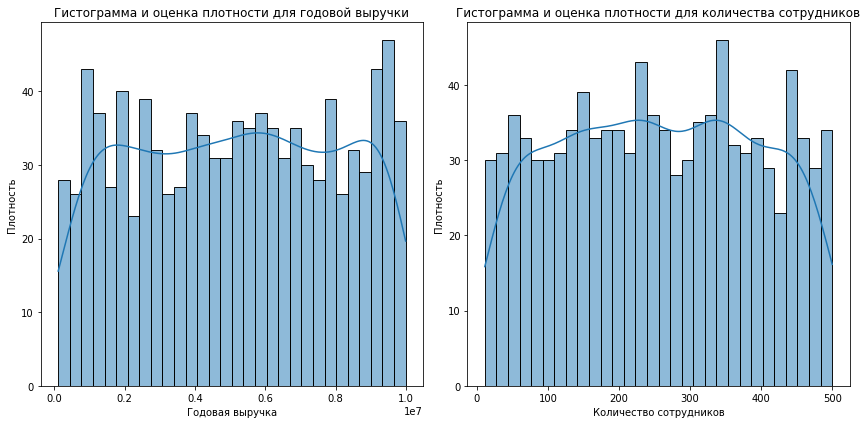

In [16]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['Годовая выручка'], kde=True, bins=30)
plt.title('Гистограмма и оценка плотности для годовой выручки')
plt.xlabel('Годовая выручка')
plt.ylabel('Плотность')

# Построение гистограммы и оценки плотности для количества сотрудников
plt.subplot(1, 2, 2)
sns.histplot(df['Количество сотрудников'], kde=True, bins=30)
plt.title('Гистограмма и оценка плотности для количества сотрудников')
plt.xlabel('Количество сотрудников')
plt.ylabel('Плотность')

# Отображение графиков
plt.tight_layout()
plt.show()

# 2.3 Корреляции между годом основания и годовой выручкой фирмы.

In [17]:
correlation = df['Год основания'].corr(df['Годовая выручка'])

In [18]:
correlation

0.016278417291295356

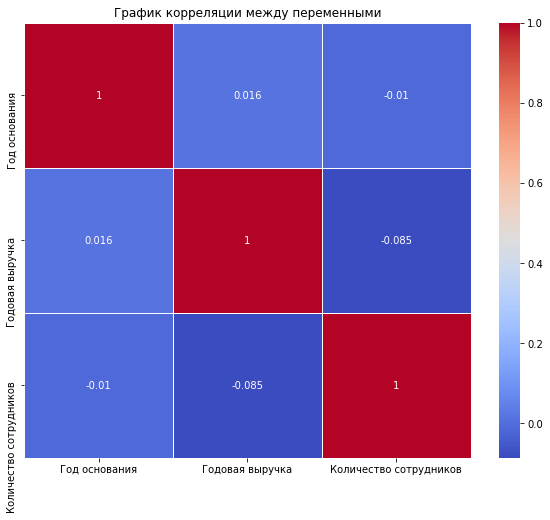

In [19]:
correlation_matrix = df.corr()


plt.figure(figsize=(10, 8))
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('График корреляции между переменными')
plt.show()